In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from scipy.spatial import distance

%matplotlib inline

In [2]:
### Kernel function generators
def linear_kernel(W, X):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
    Returns:
        matrix of size n1xn2, with w_i^T x_j in position i,j
    """
    return np.dot(W,np.transpose(X))
 
def RBF_kernel(W,X,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||w_i-x_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    dist = distance.cdist(W,X,'sqeuclidean')
    return np.exp(-(dist)/(2*sigma**2))

def polynomial_kernel(W, X, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <w_i,x_j>)^degree in position i,j
    """
    #TODO
    return (offset+linear_kernel(W,X))**degree


In [3]:
# 8.2.2 Kernel Matrix on given set of points
X = [[-4], [-1], [0], [2]]
k = linear_kernel(X,X)
print(k)

[[16  4  0 -8]
 [ 4  1  0 -2]
 [ 0  0  0  0]
 [-8 -2  0  4]]


[[-6.  ]
 [-5.99]
 [-5.98]
 ..., 
 [ 6.97]
 [ 6.98]
 [ 6.99]]
[[-4]
 [-1]
 [ 0]
 [ 2]]


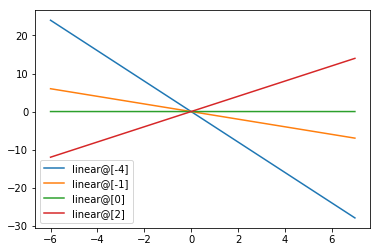

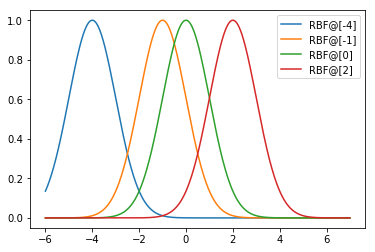

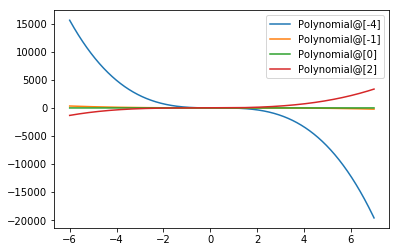

In [4]:
# 8.2.3
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 7, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
print(xpts)
print(prototypes)
# Linear kernel
y_lin = linear_kernel(prototypes, xpts)

def plot_kmf(y,name):
    for i in range(len(prototypes)):
        label = name+"@"+str(prototypes[i,:])
        plt.plot(xpts, y[i,:], label=label)
    plt.legend(loc = 'best')
    plt.show() 

# RBF Kernel
y_rbf = RBF_kernel(prototypes, xpts,1)
y_poly = polynomial_kernel(prototypes, xpts,1,3)
plot_kmf(y_lin,'linear')
plot_kmf(y_rbf,'RBF')
plot_kmf(y_poly,'Polynomial')
 

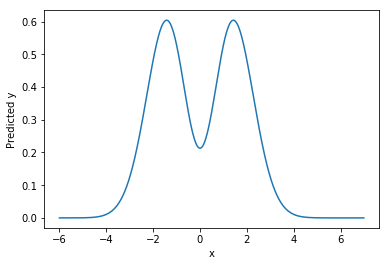

In [5]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(W,X) - a function return the cross-kernel matrix between rows of W and rows of X for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        k = self.kernel(self.prototype_points, X)
        return np.dot(self.weights, k)
from functools import partial
kernel = partial(RBF_kernel,sigma=1)
#kernel machine object
kernel_machine = Kernel_Machine(kernel,[[-1],[0],[1]],[1,-1,1])

# Plot the resulting functions
#plot_step = .001
#xpts = np.arange(-3 , 3, plot_step).reshape(-1,1)
plt.plot(xpts, kernel_machine.predict(xpts), label="Prediction Funciton")
plt.xlabel('x')
plt.ylabel('Predicted y')
plt.show()
##prototype_points = np.array([-1,0,1]).reshape(-1,1)
#weights = np.array([1,-1,1]).reshape(-1,1)
#print(prototype_points)
#print(weights)


Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

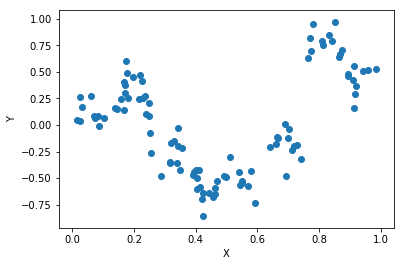

In [6]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

#8.3.1
# Training Data plot
plt.scatter(x_train,y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    K = kernel(X,X)
    alpha = np.dot(np.linalg.inv((l2reg*np.identity(K.shape[0])+K)),y).reshape(1,-1)[0]
    return Kernel_Machine(kernel, X, alpha)

(100, 1)
(100, 1)


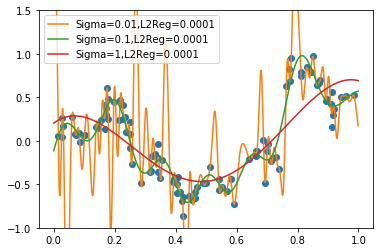

In [8]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
print(x_train.shape)
print(y_train.shape)
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

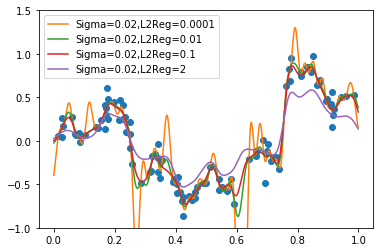

In [9]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [10]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [11]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [12]:
param_grid = [{'kernel': ['RBF'],'sigma':np.arange(0.01,0.1,0.01), 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-2,-1,0,1,2,3,4], 'degree':np.arange(4,7,1),'l2reg':[0.01,0.1,10] },
              {'kernel':['linear'],'l2reg': np.arange(100000,1000000,100000)}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09]), 'l2reg': array([ 32.    ,  16.    ,   8.    ,   4.    ,   2.    ,   1.    ,
         0.5   ,   0.25  ,   0.125 ,   0.0625])}, {'kernel': ['polynomial'], 'offset': [-2, -1, 0, 1, 2, 3, 4], 'degree': array([4, 5, 6]), 'l2reg': [0.01, 0.1, 10]}, {'kernel': ['linear'], 'l2reg': array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000,
       900000])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [13]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
87,-,RBF,0.0625,-,0.07,0.013847,0.014575
77,-,RBF,0.1250,-,0.06,0.013894,0.013956
68,-,RBF,0.2500,-,0.06,0.013922,0.015103
58,-,RBF,0.5000,-,0.05,0.013975,0.014918
67,-,RBF,0.2500,-,0.05,0.014053,0.013352
57,-,RBF,0.5000,-,0.04,0.014147,0.013103
78,-,RBF,0.1250,-,0.07,0.014286,0.015760
86,-,RBF,0.0625,-,0.06,0.014465,0.013276
56,-,RBF,0.5000,-,0.03,0.014747,0.011657
66,-,RBF,0.2500,-,0.04,0.014773,0.011603


In [14]:
# results for linear Kernel
linear_report = df_toshow[df_toshow["param_kernel"]=='linear']
linear_report.sort_values(by=['mean_test_score'])    #### Tuned to a certain extent
#plt.scatter(linear_report['param_l2reg'],linear_report['mean_test_score'])
#plt.show()

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
153,-,linear,100000.0,-,-,0.168038,0.210993
154,-,linear,200000.0,-,-,0.168039,0.210994
155,-,linear,300000.0,-,-,0.168040,0.210995
156,-,linear,400000.0,-,-,0.168040,0.210995
157,-,linear,500000.0,-,-,0.168040,0.210995
158,-,linear,600000.0,-,-,0.168040,0.210995
159,-,linear,700000.0,-,-,0.168040,0.210995
160,-,linear,800000.0,-,-,0.168040,0.210995
161,-,linear,900000.0,-,-,0.168040,0.210995


In [15]:
# results for RBF Kernel
rbf_report = df_toshow[df_toshow['param_kernel']=='RBF']
rbf_report.sort_values(by=['mean_test_score'])

# observations
# 1. mean_test_score decreases with lambda value so does the train score
# 2. for lambda =0.03125, minimum occurs between 0.01 and 0.1 or 0.01 and 0.001(values tried [.0001,.001,.01,.1,1,10])
# 3. min(=0.018699) at 0.009(values tried(0.001,0.1))
# 4. min(=0.018575) at 0.0095(values tried (0.009,0.01))
# 5. min(=	0.014036) at 0.07(values tried (0.01,0.1))
# 6. for the given lambda_range, minm(= 0.013847) occurs at 0.0625 and 0.07 sigma

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
87,-,RBF,0.0625,-,0.07,0.013847,0.014575
77,-,RBF,0.1250,-,0.06,0.013894,0.013956
68,-,RBF,0.2500,-,0.06,0.013922,0.015103
58,-,RBF,0.5000,-,0.05,0.013975,0.014918
67,-,RBF,0.2500,-,0.05,0.014053,0.013352
57,-,RBF,0.5000,-,0.04,0.014147,0.013103
78,-,RBF,0.1250,-,0.07,0.014286,0.015760
86,-,RBF,0.0625,-,0.06,0.014465,0.013276
56,-,RBF,0.5000,-,0.03,0.014747,0.011657
66,-,RBF,0.2500,-,0.04,0.014773,0.011603


In [16]:
# results for polynomial kernel
poly_report = df_toshow[df_toshow['param_kernel']=='polynomial']
poly_report.sort_values(by=['mean_test_score'])
# observations
# For offset=0,degree=2, minm(=0.151723) occurs between (0.1,0.01)
# minm (=0.151724) at 0.09(0.01,.1)
# minm(=0.151723) t 0.1

# now keeping lambda = 0.1
# min=(0.126171) at 6

# now keeping degree=6 and lambda=0.1
# min(=0.032528) at offset=3

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
144,6,polynomial,0.10,3,-,0.032528,0.048157
135,6,polynomial,0.01,1,-,0.032700,0.049496
116,5,polynomial,0.01,3,-,0.032724,0.048077
117,5,polynomial,0.01,4,-,0.033097,0.046028
145,6,polynomial,0.10,4,-,0.033520,0.044830
115,5,polynomial,0.01,2,-,0.033573,0.052833
143,6,polynomial,0.10,2,-,0.035520,0.057907
136,6,polynomial,0.01,2,-,0.036289,0.042999
137,6,polynomial,0.01,3,-,0.038178,0.042557
138,6,polynomial,0.01,4,-,0.038890,0.042522


In [17]:
# The best combination
rbf_report=rbf_report.sort_values(by=['mean_test_score'])
poly_report = poly_report.sort_values(by=['mean_test_score'])
best_rbf_params = rbf_report.iloc[0]
best_poly_params = poly_report.iloc[0]
print("Best RBF Hyperparameters\n", best_rbf_params)
print("Best Polynomial parameters\n", best_poly_params)

Best RBF Hyperparameters
 param_degree                -
param_kernel              RBF
param_l2reg            0.0625
param_offset                -
param_sigma              0.07
mean_test_score     0.0138468
mean_train_score    0.0145748
Name: 87, dtype: object
Best Polynomial parameters
 param_degree                 6
param_kernel        polynomial
param_l2reg                0.1
param_offset                 3
param_sigma                  -
mean_test_score      0.0325283
mean_train_score      0.048157
Name: 144, dtype: object


In [18]:
# Can be a more convenient way to look at the table
#import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
#qgrid.show_grid(df_toshow)

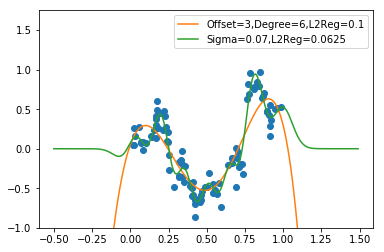

In [19]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= best_poly_params['param_offset']     #### Inseted Code here
degree = best_poly_params['param_degree']    #### Inseted Code here
l2reg = best_poly_params['param_l2reg']      #### Inseted Code here
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = best_rbf_params['param_sigma']  #### Inseted Code here
l2reg= best_rbf_params['param_l2reg']   ### Inserted Code here
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

Comments:  
RBF kernel fits the data really well.
Polynomial kernel is restricted from overfitting the data using the regularization term.


In [ ]:
# Bayes Decision Function and Risk


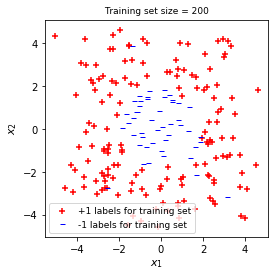

In [39]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

Clearly the data is not linearly separable.  
But the data is quadratically separable.
We can obtain a reasonalbe classifier using RBF kernel, which could not be obtained otherwise as the data is not linearly separable and RBF provides a richer set of features to work with.  


In [40]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [44]:
from random import randint
# kernelized Pegasos(train_soft_svm)
max_iters=10
def train_soft_svm(X,y,kernel,Lambda):
    k=kernel(X,X)
    num = y.shape[0]
    d=X.shape[0]
    iters=0
    t=0
    alpha = np.zeros(d)
    while(iters<max_iters):
        iters = iters+1
        t=t+1
        eta = 1/(t*Lambda)
        j = randint(1,num)
        if ((y[j]*k[j]).dot(alpha.T))<1:
            alpha = (1-1/t)*alpha
            alpha[j]=alpha[j]+(eta*y[j])
        else:
            alpha = (1-1/t)*alpha

    return Kernel_Machine(kernel, X, alpha)


In [ ]:
# Hyperparameter Tuning
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelSVM(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 


In [46]:
#Hyperparameter Tuning Contd
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
import pdb
#pdb.set_trace()
f = train_soft_svm(x_train, y_train, k, Lambda=1)

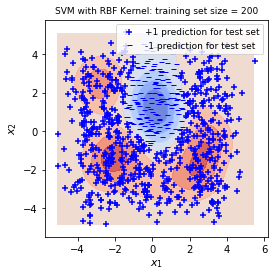

In [47]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 


#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()